In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
df = pd.read_clipboard()

In [38]:
df["Total"] = df["Total"].apply(lambda x: x.replace(',', '')).astype("int")
df["Nonmover"] = df["Nonmover"].apply(lambda x: x.replace(',', '')).astype("int")
df["Same county"] = df["Same county"].apply(lambda x: x.replace(',', '')).astype("int")
df["Different county, same state"] = df["Different county, same state"].apply(lambda x: x.replace(',', '')).astype("int")
df["Different region"] = df["Different region"].apply(lambda x: x.replace(',', '')).astype("int")
df.head()

,AGE,Total,Nonmover,Same county,"Different county, same state","Different state, same division","Different division, same region",Different region,Abroad
0,.5 to 9 years,20473,11518,5707,1652,412,243,587,355
1,.10 to 14 years,20606,13357,4683,1289,303,199,499,276
2,.15 to 19 years,20840,14177,4266,1198,270,205,428,297
3,.20 to 24 years,22215,11236,6158,2447,444,359,892,679
4,.25 to 29 years,21867,8485,7289,2908,623,505,1183,873


In [40]:
df.describe()

,Total,Nonmover,Same county,"Different county, same state","Different state, same division","Different division, same region",Different region,Abroad
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,16459.277778,10912.277778,3294.722222,1110.555556,244.333333,186.222222,451.388889,260.055556
std,6305.768011,3696.678936,2326.973414,820.442579,176.222119,135.529270,329.986121,261.968672
min,5480.000000,4829.000000,379.000000,147.000000,33.000000,22.000000,43.000000,3.000000
25%,11039.500000,8584.000000,955.250000,400.000000,66.500000,87.250000,171.000000,42.750000
50%,20238.000000,11259.500000,3534.000000,1066.500000,243.000000,180.500000,426.000000,195.000000
75%,21064.250000,13342.000000,5091.000000,1484.500000,379.250000,243.000000,573.250000,347.250000
max,22233.000000,17026.000000,7289.000000,2908.000000,623.000000,505.000000,1183.000000,873.000000


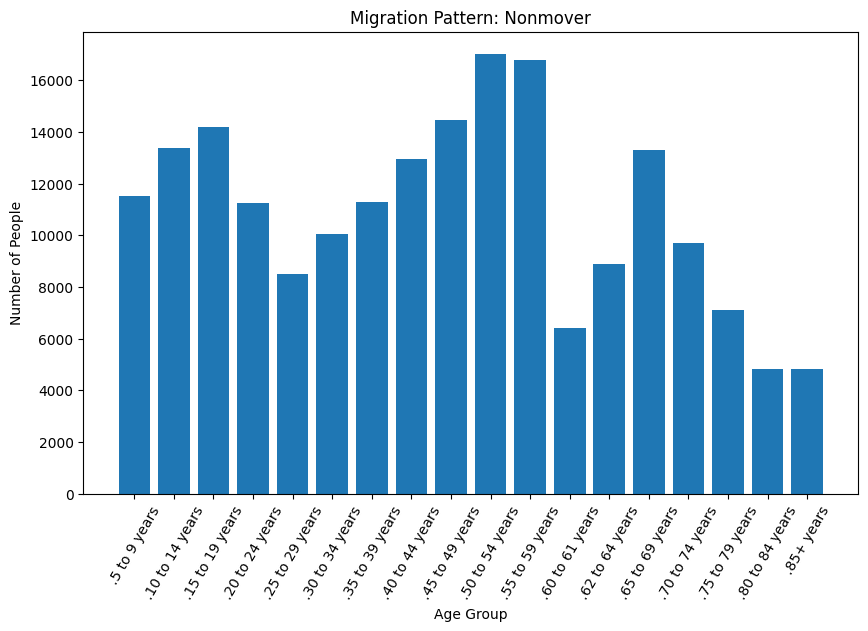

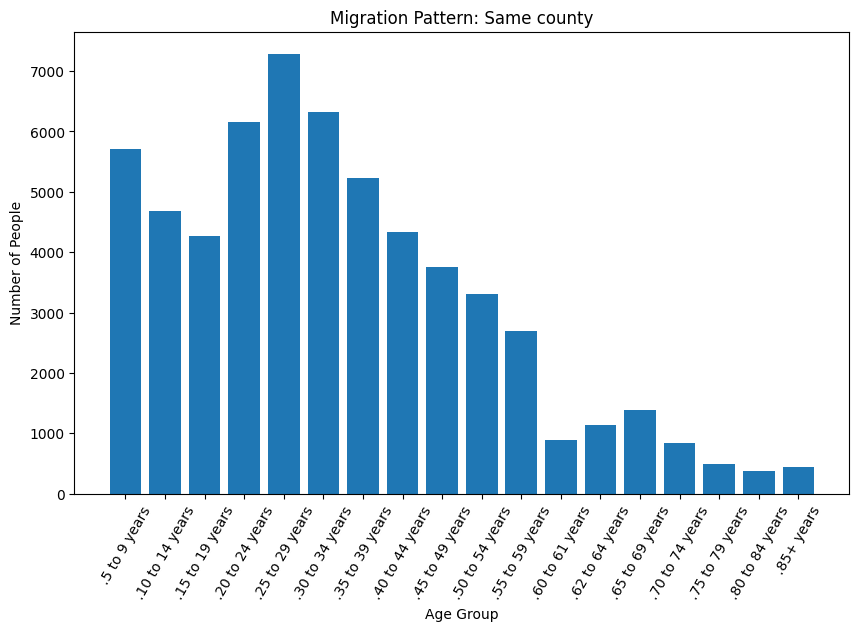

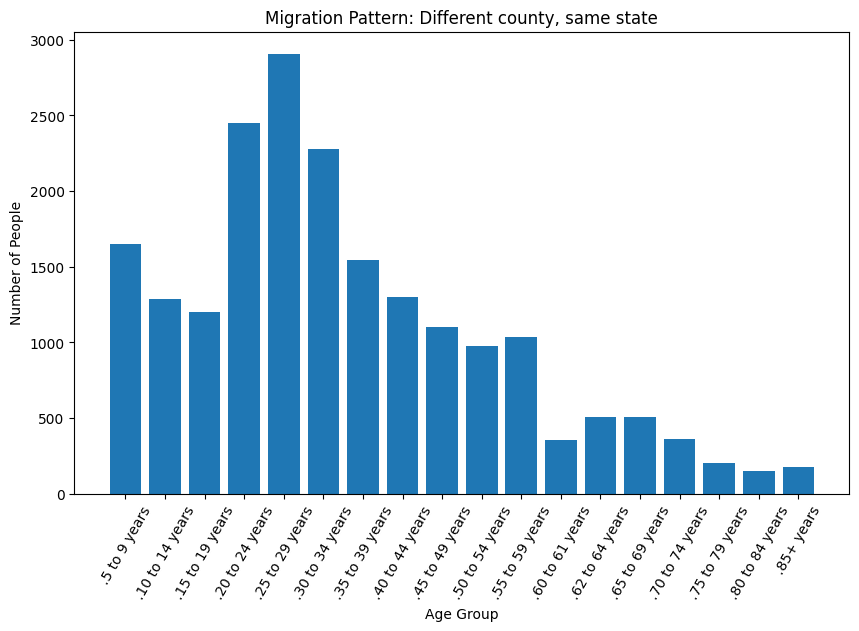

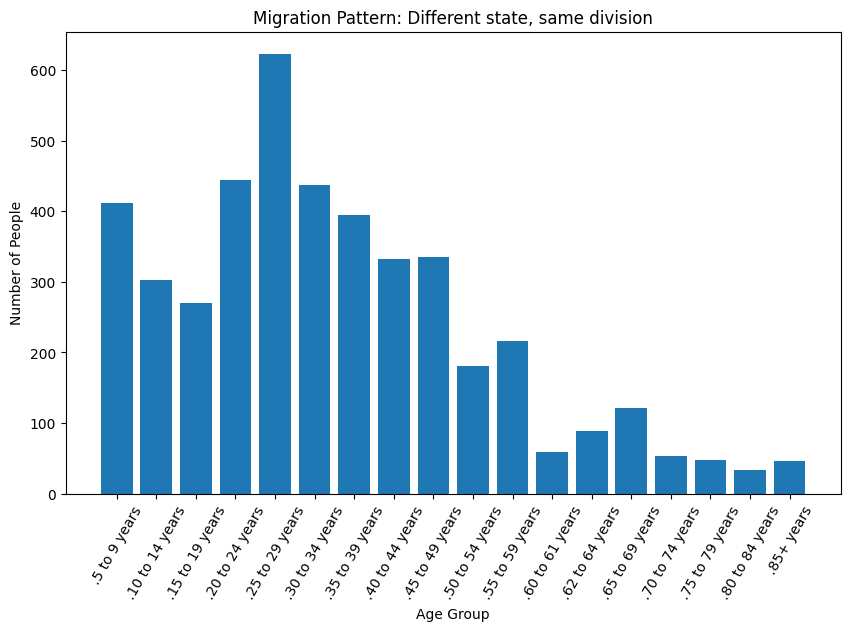

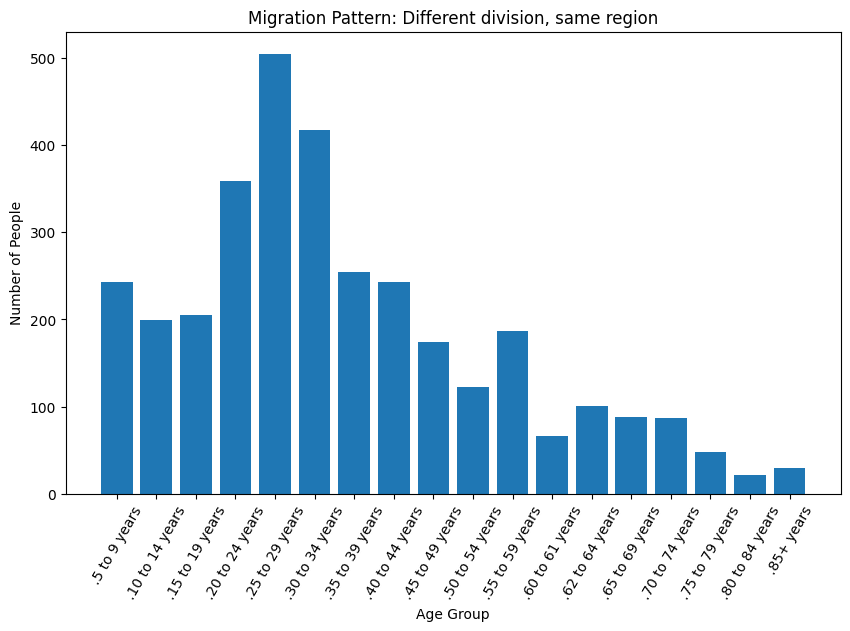

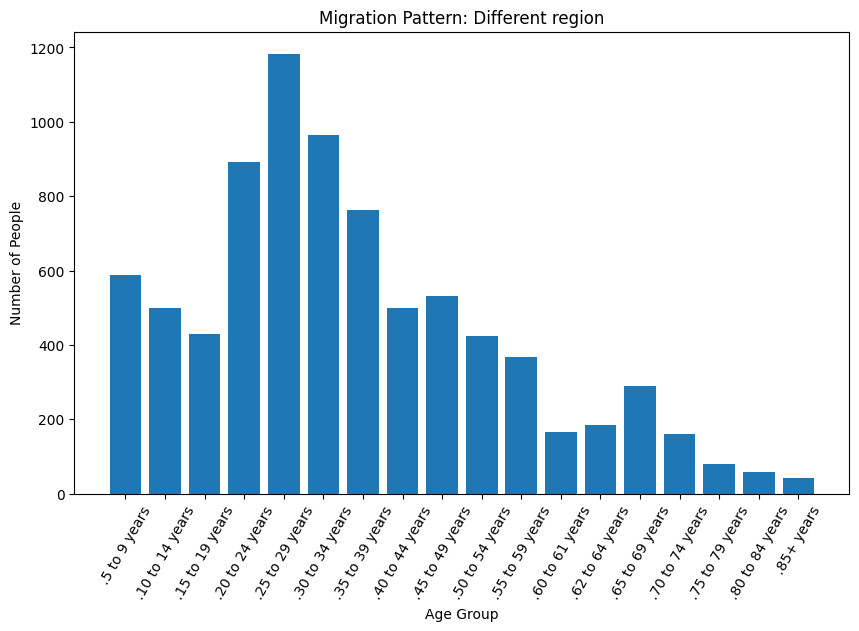

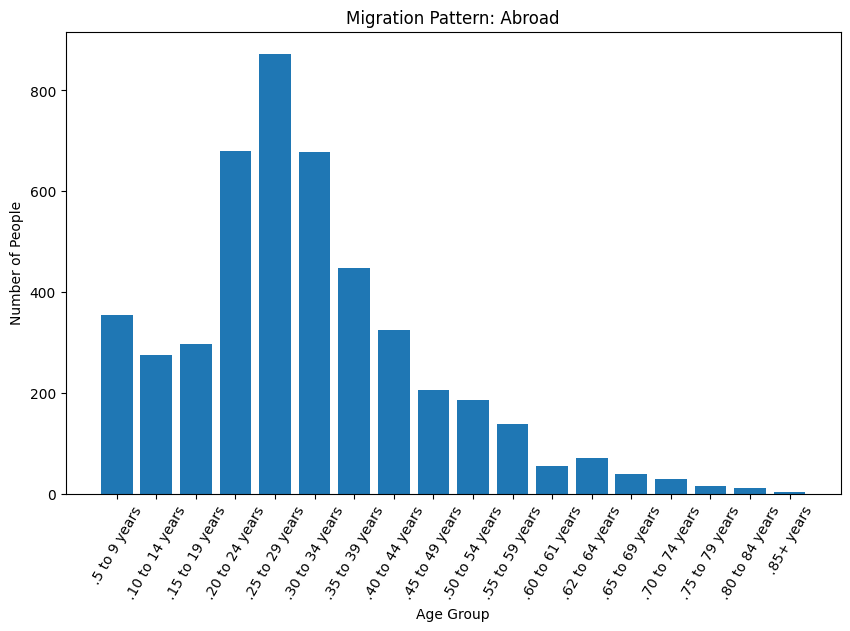

In [42]:
age_groups = df['AGE']
mover_categories = df.columns[2:]

for category in mover_categories:
    plt.figure(figsize=(10, 6))
    plt.bar(age_groups, df[category])
    plt.xlabel('Age Group')
    plt.ylabel('Number of People')
    plt.title(f'Migration Pattern: {category}')
    plt.xticks(rotation=60)
    plt.show()

(array([ 2500.,  5000.,  7500., 10000., 12500., 15000., 17500., 20000.,
        22500., 25000.]),
 [Text(2500.0, 0, '2500'),
  Text(5000.0, 0, '5000'),
  Text(7500.0, 0, '7500'),
  Text(10000.0, 0, '10000'),
  Text(12500.0, 0, '12500'),
  Text(15000.0, 0, '15000'),
  Text(17500.0, 0, '17500'),
  Text(20000.0, 0, '20000'),
  Text(22500.0, 0, '22500'),
  Text(25000.0, 0, '25000')])

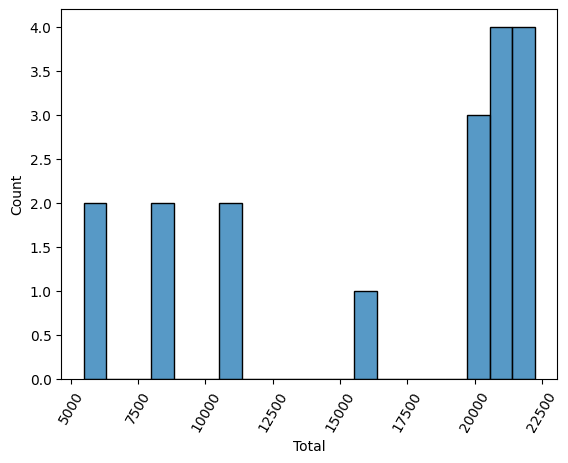

In [35]:
sns.histplot(data=df, x="Total", bins=20)
plt.xticks(rotation=60)

## Simulations

Text(0.5, 1.0, 'Mu Hat 1: 9.945, Mu Hat 2: 9.997')

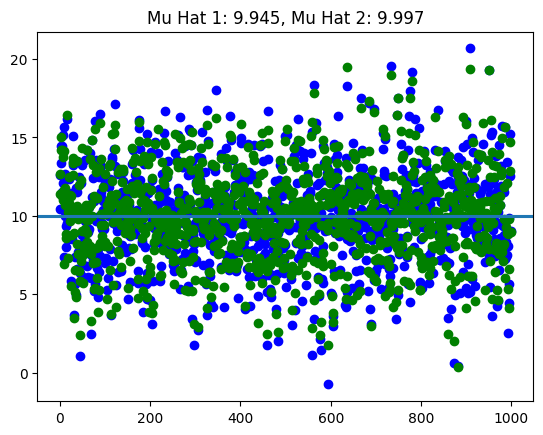

In [63]:
n_sims = 1000
mu_1 = []
mu_2 = []

for _ in range(n_sims):
    y1 = np.random.normal(10, 5)
    y2 = np.random.normal(10, 5)
    y3 = np.random.normal(10, 5)

    mu_hat_1 = 0.25*y1 + 0.5*y2 + 0.25*y3
    mu_hat_2 = (1/3)*y1 + (1/3)*y2 + (1/3)*y3

    mu_1.append(mu_hat_1)
    mu_2.append(mu_hat_2)

plt.plot(mu_1, "bo")
plt.plot(mu_2, "go")
plt.axhline(np.mean(mu_1))
plt.axhline(np.mean(mu_2))
plt.title(f"Mu Hat 1: {np.mean(mu_1):.3f}, Mu Hat 2: {np.mean(mu_2):.3f}")